# Регулярные выражения
**Регулярное выражение** — это строка, задающая шаблон поиска подстрок в тексте. Одному шаблону может соответствовать много разных строчек. 

<https://regex101.com/r/F8dY80/3> - удобный тестировщик ReGex


Любая строка (в которой нет символов `.^*+?{}[]\|())` + `Доллар` сама по себе является регулярным выражением. Так, выражению Хаха будет соответствовать строка “Хаха” и только она. Регулярные выражения являются регистрозависимыми, поэтому строка “хаха” (с маленькой буквы) уже не будет соответствовать выражению выше. Подобно строкам в языке Python, регулярные выражения имеют спецсимволы `.^*+?{}[]\|()` + `Доллар`, которые в регулярках являются управляющими конструкциями. Для написания их просто как символов требуется их экранировать, для чего нужно поставить перед ними знак \. Так же, как и в питоне, в регулярных выражениях выражение \n соответствует концу строки, а \t — табуляции.

## 1.1 Шаблоны одного символа
1. `.` - один любой символ, кроме новой строки `\n`

2. `\d` ~ `[0:9]` - любая цифра

3. `\D` ~ `[^0:9]` любой символ, кроме цифры

4. `\s` ~ `\n\f\r\t\v` - любой пробельный символ(`' '`, `'\t'`, `'\n'`,`'\s'` - любой из пробелов)

5. `\S` - любой НЕпробельный символ

6. `\w` ~ `[a-zA-Z0-9а-яА-ЯеЁ_]` - любая буква (то, что может быть частью слова), цифры и _

7. `\W` ~ `[^a-zA-Z0-9а-яА-ЯеЁ_]` - любая НЕ-буква, не-цифра и не-подчеркивание

8. `[..]` - один из символов в скобках, любой символ из диапазона

9. `[^..]` - любой символ, кроме перечисленных в скобках
    1. `[abc-]` - если нужен минус, то нужно добавить его либо в **начало**, либо в **конец**
    1.  `[*[(+\\\]\t]` - внутри скобок нужно экранировать лишь `\` и `]`
    
10. `\b` - соответствует позиции, а не символу. Начало или конец слова.
11. `\B` - не граница слова: либо и слева и справа не буквы, либо слева и справа буквы 

## 1.2 Квантификаторы (указание количества повторений)

1. `{n}` - ровно `n` повторений

2. `{m,n}` - от m до n повторений **включительно**

3. `{m,}` - не менее m повторений

4. `{,n}` - не более n повторений

5. `?` - ноль или одно вхождение, синоним {0,1}

6. `*` - `{0,}` - ноль или более

7. `+` - `{1,}` - один или более

8. `*?` - по умолчанию квантификаторы **жадные** - захватывают максимально возможное число символов. Добавление `?` делает их ленивыми, они захватывают минимально возможное число символов.

9. `.*?` - любой символ

## 1.3 Регулярные выражения в Python

1. `re.search(pattern, string)` - найти в строке *string* первую строчку, подходящую под шаблон *pattern*;

2. `re.fullmatch(pattern, string)` - Проверить, подходит ли строка *string* под шаблон *pattern*;

3. `re.split(pattern, string, maxsplit=0)` - аналог `str.split()`, только разделение происходит по подстрокам, подходящим под шаблон pattern;

4. `re.findall(pattern, string)` - найти в строке *string* все непересекающиеся шаблоны *pattern*;

5. `re.finditer(pattern, string)` - итератор всем непересекающимся шаблонам pattern в строке string (выдаются match-объекты);

6. `re.sub(pattern, repl, string, count=0)` - заменить в строке string все непересекающиеся шаблоны pattern на repl;

7. Для того чтобы не было нагромождений слэшей перед открывающейся кавычкой нужно поставить символ `r`, что скажет питону - не рассматривай \ как экранирующий символ.


## 1.4 Использование дополнительных флагов Python

1. `flags = re.ASCII` - ищет только те символы, что содержатся в ASCII, ускоряет работу

2. `flags = re.IGNORECASE` - не различать заглавные и маленькие буквы

3. `flags = re.MULTILINE` - cпециальные символы `^,$ $` и  соответствуют началу и концу каждой строки

4. `flags = re.DOTALL` - по умолчанию символ `\n` конца строки не подходит под точку. С этим флагом точка — вообще любой символ

# 2 Скобочные группы и перечисления

## 2.1 Перечисления (операция "или")

Можно использовать знак `|` ~ `or`. Например, отдельные овощи в тексте можно искать при помощи шаблона `морковк|св[её]кл|картошк|редиск`.

## 2.2 Скобочные группы (группировка + квантификаторы)

Зачастую шаблон состоит из нескольких повторяющихся групп. 

Так, MAC-адрес сетевого устройства обычно записывается как шесть групп из двух шестнадцатиричных цифр, разделённых символами - или :. Например, `01:23:45:67:89:ab.` Каждый отдельный символ можно задать как `[0-9a-fA-F]`, и можно весь шаблон записать так:

`[0-9a-fA-F]{2}[:-][0-9a-fA-F]{2}[:-][0-9a-fA-F]{2}[:-][0-9a-fA-F]{2}[:-][0-9a-fA-F]{2}[:-][0-9a-fA-F]{2}`

Ситуация становится гораздо сложнее, когда количество групп заранее не зафиксировано.

Чтобы разрешить эту проблему в синтаксисе регулярных выражений есть группировка `(?:...)`.
Можно писать круглые скобки и без значков `?:`, однако от этого у группировки значительно меняется смысл, регулярка начинает работать гораздо медленнее.

Итак, если `REGEXP` — шаблон, то `(?:REGEXP)` — эквивалентный ему шаблон. Разница только в том, что теперь к `(?:REGEXP)` можно применять квантификаторы, указывая, сколько именно раз должна повториться группа. Например, шаблон для поиска MAC-адреса, можно записать так:

`[0-9a-fA-F]{2}(?:[:-][0-9a-fA-F]{2}){5}`

## 2.3 Скобки плюс перечисления

Также скобки `(?:...)` позволяют локализовать часть шаблона, внутри которого происходит перечисление. Например, шаблон `(?:он|тот) (?:шёл|плыл)` соответствует каждой из строк «он шёл», «он плыл», «тот шёл», «тот плыл», и является синонимом он шёл|он плыл|тот шёл|тот плыл.

In [5]:
import re 

match = re.search(r'\d\d\D\d\d', r'Телефон 123-12-12') 
print(match[0] if match else 'Not found') 
# -> 23-12 
match = re.search(r'\d\d\D\d\d', r'Телефон 1231212') 
print(match[0] if match else 'Not found') 
# -> Not found 

match = re.fullmatch(r'\d\d\D\d\d', r'12-12') 
print('YES' if match else 'NO') 
# -> YES 
match = re.fullmatch(r'\d\d\D\d\d', r'Т. 12-12') 
print('YES' if match else 'NO') 
# -> NO 

print(re.split(r'\W+', 'Где, скажите мне, мои очки??!')) 
# -> ['Где', 'скажите', 'мне', 'мои', 'очки', ''] 

print(re.findall(r'\d\d\.\d\d\.\d{4}', 
                 r'Эта строка написана 19.01.2018, а могла бы и 01.09.2017')) 
# -> ['19.01.2018', '01.09.2017'] 

for m in re.finditer(r'\d\d\.\d\d\.\d{4}', r'Эта строка написана 19.01.2018, а могла бы и 01.09.2017'): 
    print('Дата', m[0], 'начинается с позиции', m.start()) 
# -> Дата 19.01.2018 начинается с позиции 20 
# -> Дата 01.09.2017 начинается с позиции 45 

print(re.sub(r'\d\d\.\d\d\.\d{4}', 
             r'DD.MM.YYYY', 
             r'Эта строка написана 19.01.2018, а могла бы и 01.09.2017')) 
# -> Эта строка написана DD.MM.YYYY, а могла бы и DD.MM.YYYY 

23-12
Not found
YES
NO
['Где', 'скажите', 'мне', 'мои', 'очки', '']
['19.01.2018', '01.09.2017']
Дата 19.01.2018 начинается с позиции 20
Дата 01.09.2017 начинается с позиции 45
Эта строка написана DD.MM.YYYY, а могла бы и DD.MM.YYYY


In [6]:
print(re.findall(r'\d+', '12 + ٦٧')) 
# -> ['12', '٦٧'] 
print(re.findall(r'\w+', 'Hello, мир!')) 
# -> ['Hello', 'мир'] 
print(re.findall(r'\d+', '12 + ٦٧', flags=re.ASCII)) 
# -> ['12'] 
print(re.findall(r'\w+', 'Hello, мир!', flags=re.ASCII)) 
# -> ['Hello'] 
print(re.findall(r'[уеыаоэяию]+', 'ОООО ааааа ррррр ЫЫЫЫ яяяя')) 
# -> ['ааааа', 'яяяя'] 
print(re.findall(r'[уеыаоэяию]+', 'ОООО ааааа ррррр ЫЫЫЫ яяяя', flags=re.IGNORECASE)) 
# -> ['ОООО', 'ааааа', 'ЫЫЫЫ', 'яяяя'] 

text = r""" 
Торт 
с вишней1 
вишней2 
""" 
print(re.findall(r'Торт.с', text)) 
# -> [] 
print(re.findall(r'Торт.с', text, flags=re.DOTALL)) 
# -> ['Торт\nс'] 
print(re.findall(r'виш\w+', text, flags=re.MULTILINE)) 
# -> ['вишней1', 'вишней2'] 
print(re.findall(r'^виш\w+', text, flags=re.MULTILINE)) 
# -> ['вишней2'] 

['12', '٦٧']
['Hello', 'мир']
['12']
['Hello']
['ааааа', 'яяяя']
['ОООО', 'ааааа', 'ЫЫЫЫ', 'яяяя']
[]
[]
['вишней1', 'вишней2']
['вишней2']


# 3 Группирующие скобки (...) и match-объекты в Python

## 3.1 Match-объекты

Если функции `re.search`, `re.fullmatch` не находят соответствие шаблону в строке, то они возвращают `None`, функция `re.finditer` не выдаёт ничего. Однако если соответствие найдено, то возвращается `match`-объект. Эта штука содержит в себе кучу полезной информации о соответствии шаблону. Полный набор атрибутов можно посмотреть в [документации](https://docs.python.org/3/library/re.html#match-objects) , а здесь приведём самое полезное.

1. `match[0], match.group()` - подстрока соответствующая шаблону, `match.group(0)` - целая строка, `match.group(1)` - начинает выводить подстроки найденной строки.

2. `match.start()` - индекс в исходной строке, начиная с которого идёт найденная подстрока

3. `match.end()` - индекс в исходной строке, который следует сразу за найденной подстрокой

4. `match.groups()` - возвращает tuple, содержащий все подгрупы начиная с одного в независимости от того сколько групп в патерне.

5. `match.groupdict()` - выводит словарь, содержащий в качестве ключей все подгруппы match.

6. `match.span()` - возвращает 2-х размерный tuple `(m.start(group),m.end(group))`. Если нет, то `(-1,-1)`.

In [22]:
m = re.match(r"(?P<name>\w+) (?P<beach>\w+)", "Isaac Newton, physicist")

In [23]:
m.group(0), m.group(1), m.group(2), m.group(1,2)

('Isaac Newton', 'Isaac', 'Newton', ('Isaac', 'Newton'))

In [24]:
m.groups(), m.groupdict()

(('Isaac', 'Newton'), {'name': 'Isaac', 'beach': 'Newton'})

In [15]:
m = re.match(r"(?P<first_name>\w+) (?P<last_name>\w+)", "Malcolm Reynolds")
m.groupdict()

{'first_name': 'Malcolm', 'last_name': 'Reynolds'}

## 3.2 Группирующие скобки (...)

Если в шаблоне регулярного выражения встречаются скобки `(...)` без `?:`, то они становятся *группирующими*. В match-объекте, который возвращают `re.search, re.fullmatch и re.finditer`, по каждой такой группе можно получить ту же информацию, что и по всему шаблону. А именно часть подстроки, которая соответствует `(...)`, а также индексы начала и окончания в исходной строке. Достаточно часто это бывает полезно.

In [29]:
import re 
pattern = r'\s*([А-Яа-яЁё]+)(\d+)\s*' 
string = r'---   Опять45   ---' 
match = re.search(pattern, string) 
print(f'Найдена подстрока >{match[0]}< с позиции {match.start(0)} до {match.end(0)}') 
print(f'Группа букв >{match[1]}< с позиции {match.start(1)} до {match.end(1)}') 
print(f'Группа цифр >{match[2]}< с позиции {match.start(2)} до {match.end(2)}')

Найдена подстрока >   Опять45   < с позиции 3 до 16
Группа букв >Опять< с позиции 6 до 11
Группа цифр >45< с позиции 11 до 13


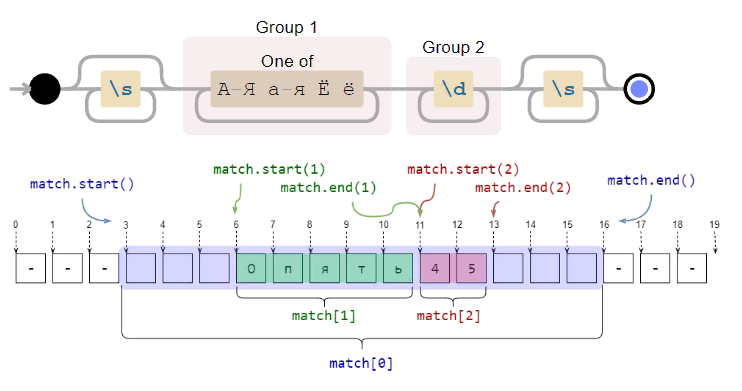

## 3.3 Тонкости со скобками и нумерацией групп

Если к группирующим скобкам применён квантификатор (то есть указано число повторений), то подгруппа в match-объекте будет создана только для последнего соответствия. Например, если бы в примере выше квантификаторы были снаружи от скобок `'\s*([А-Яа-яЁё])+(\d)+\s*'`, то вывод был бы таким:

In [30]:
pattern = r'\s*([А-Яа-яЁё])+(\d)+\s*'
string = r'---   Опять45   ---' 
match = re.search(pattern, string) 
print(f'Найдена подстрока >{match[0]}< с позиции {match.start(0)} до {match.end(0)}') 
print(f'Группа букв >{match[1]}< с позиции {match.start(1)} до {match.end(1)}') 
print(f'Группа цифр >{match[2]}< с позиции {match.start(2)} до {match.end(2)}')

Найдена подстрока >   Опять45   < с позиции 3 до 16
Группа букв >ь< с позиции 10 до 11
Группа цифр >5< с позиции 12 до 13


Внутри группирующих скобок могут быть и другие группирующие скобки. В этом случае их нумерация производится в соответствии с номером появления открывающей скобки с шаблоне.

In [31]:
pattern = r'((\d)(\d))((\d)(\d))' 
string = r'123456789' 
match = re.search(pattern, string) 
print(f'Найдена подстрока >{match[0]}< с позиции {match.start(0)} до {match.end(0)}') 
for i in range(1, 7): 
    print(f'Группа №{i} >{match[i]}< с позиции {match.start(i)} до {match.end(i)}') 

Найдена подстрока >1234< с позиции 0 до 4
Группа №1 >12< с позиции 0 до 2
Группа №2 >1< с позиции 0 до 1
Группа №3 >2< с позиции 1 до 2
Группа №4 >34< с позиции 2 до 4
Группа №5 >3< с позиции 2 до 3
Группа №6 >4< с позиции 3 до 4


## 3.4 Группы и re.findall

Если в шаблоне есть группирующие скобки, то вместо списка найденных подстрок будет возвращён список кортежей, в каждом из которых только соответствие каждой группе. Это не всегда происходит по плану, поэтому обычно нужно использовать негруппирующие скобки `(?:...)`.

In [32]:
print(re.findall(r'([a-z]+)(\d*)', r'foo3, im12, go, 24buz42')) 

[('foo', '3'), ('im', '12'), ('go', ''), ('buz', '42')]


## 3.5 Группы и re.split

Если в шаблоне нет группирующих скобок, то `re.split` работает очень похожим образом на `str.split`. А вот если группирующие скобки в шаблоне есть, то между каждыми разрезанными строками будут все соответствия каждой из подгрупп.

In [34]:
print(re.split(r'(\s*)([+*/-])(\s*)', r'12  +  13*15   - 6')) 

['12', '  ', '+', '  ', '13', '', '*', '', '15', '   ', '-', ' ', '6']


В некоторых ситуация эта возможность бывает чрезвычайно удобна! Например, достаточно из предыдущего примера убрать лишние группы, и польза сразу станет очевидна!

In [38]:
print(re.split(r'\s*([+*/-])\s*', r'12  +  13*15   - 6')) 

['12', '+', '13', '*', '15', '-', '6']


## 3.6 Использование групп при заменах

Использование групп добавляет замене (`re.sub`, работает не только в питоне, а почти везде) очень удобную возможность: в шаблоне для замены можно ссылаться на соответствующую группу при помощи `\1, \2, \3`, .... Например, если нужно даты из неудобного формата ММ/ДД/ГГГГ перевести в удобный ДД.ММ.ГГГГ, то можно использовать такую регулярку:

In [39]:
text = "We arrive on 03/25/2018. So you are welcome after 04/01/2018." 
print(re.sub(r'(\d\d)/(\d\d)/(\d{4})', r'\2.\1.\3', text)) 

We arrive on 25.03.2018. So you are welcome after 01.04.2018.


Если групп больше 9, то можно ссылаться на них при помощи конструкции вида `\g<12>`.

## 3.7 Замена с обработкой шаблона функцией в питоне

Ещё одна питоновская фича для регулярных выражений: в функции `re.sub` вместо текста для замены можно передать функцию, которая будет получать на вход match-объект и должна возвращать строку, на которую и будет произведена замена. Это позволяет не писать ад в шаблоне для замены, а использовать удобную функцию. 

Например, «зацензурим» все слова, начинающиеся на букву «Х»:

In [40]:
def repl(m): 
    return '>censored(' + str(len(m[0])) + ')<' 
text = "Некоторые хорошие слова подозрительны: хор, хоровод, хороводоводовед." 
print(re.sub(r'\b[хХxX]\w*', repl, text)) 

Некоторые >censored(7)< слова подозрительны: >censored(3)<, >censored(7)<, >censored(15)<.


## 3.8 Ссылки на группы при поиске

При помощи `\1, \2, \3, ... и \g<12>` можно ссылаться на найденную группу и при поиске. Необходимость в этом встречается довольно редко, но это бывает полезно при обработке простых xml и html.

In [41]:
text = "SPAM <foo>Here we can <boo>find</boo> something interesting</foo> SPAM" 
print(re.search(r'<(\w+?)>.*?</\1>', text)[0]) 

text = "SPAM <foo>Here we can <foo>find</foo> OH, NO MATCH HERE!</foo> SPAM" 
print(re.search(r'<(\w+?)>.*?</\1>', text)[0])

<foo>Here we can <boo>find</boo> something interesting</foo>
<foo>Here we can <foo>find</foo>


# 4 Шаблоны, соответствующие не конкректному тексту, а позиции

Отдельные части регулярного выражения могут соответствовать не части текста, а позиции в этом тексте. То есть такому шаблону соответствует не подстрока, а некоторая позиция в тексте, как бы «между» буквами.

## 4.1 Простые шаблоны, соответствующие позиции

Для определённости строку, в которой мы ищем шаблон будем называть всем текстом.Каждую строчку всего текста (то есть каждый максимальный кусок без символов конца строки) будем называть строчкой текста.

1. `^` - начало всего текста или начало строчки текста, если `flag = re.MULTILINE`
2. `Доллар` - 	Конец всего текста или конец строчки текста, если `flag=re.MULTILINE`
3. `\A` - строго начало текста
4. `\Z` - строго конец всего текста

## 4.2 Сложные шаблоны, соответствующие позиции (lookaround и Co)

Следующие шаблоны применяются в основном в тех случаях, когда нужно уточнить, что должно идти непосредственно перед или после шаблона, но при этом не включать найденное в match-объект.
1. `(?=...)` - *lookahead assertion*, соответствует каждой позиции, сразу после которой начинается соответствие шаблону ...

2. `(?!...)` - *negative lookahead assertion*, соответствует каждой позиции, сразу после которой НЕ может начинаться шаблон ...

3. `(?<=...)` - *positive lookbehind assertion*, соответствует каждой позиции, которой может заканчиваться шаблон ... Длина шаблона должна быть фиксированной, то есть `abc и a|b` — это ОК, а `a* и a{2,3}` — нет.

4. `(?<!...)` - negative lookbehind assertion, соответствует каждой позиции, которой НЕ может заканчиваться шаблон ...

5. `(?#...)` - комменатрий, текст в скобках игнорируется

Каждый их этих шаблонов проверяет лишь то, что идёт непосредственно перед позицией или непосредственно после позиции. Если пару таких шаблонов написать рядом, то проверки будут независимы (то есть будут соответствовать AND в каком-то смысле).

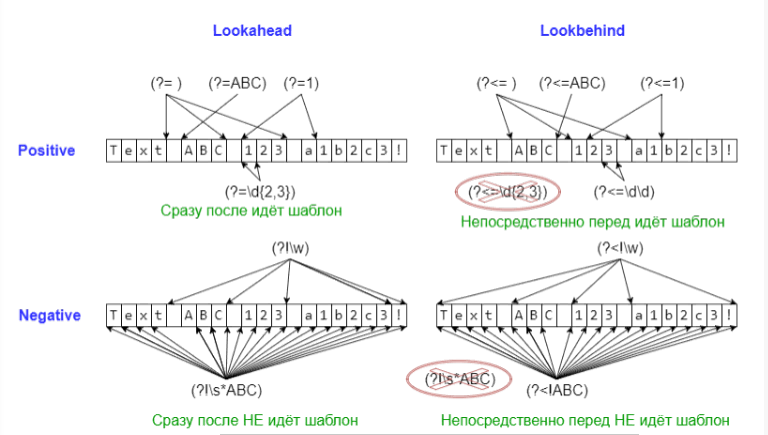

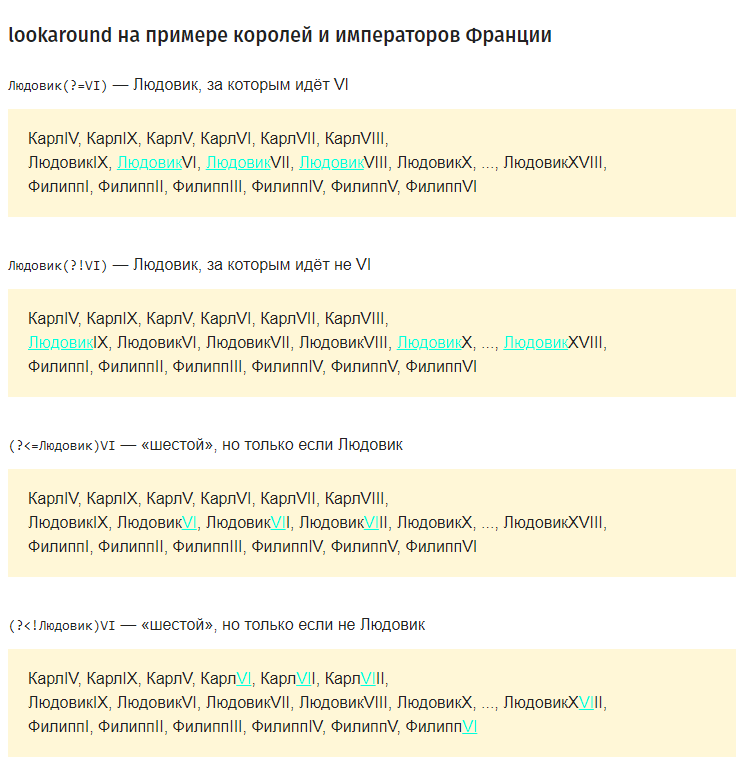

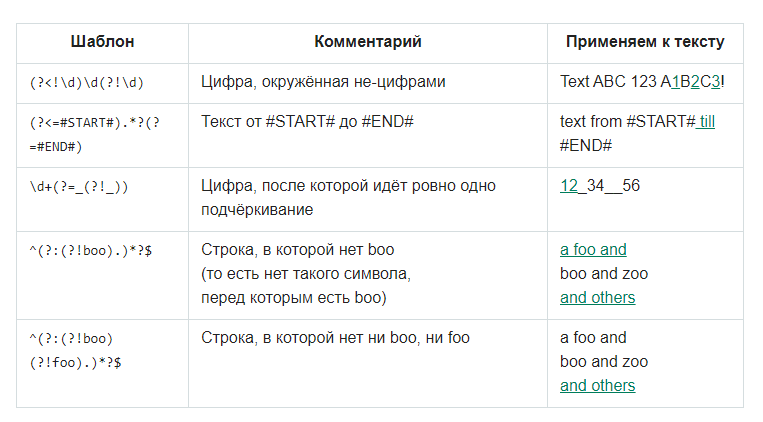

## 5. Задачи

1. Найдите все натуральные числа (возможно, окружённые буквами);
2. Найдите все «слова», написанные капсом (то есть строго заглавными), возможно внутри настоящих слов (аааБББввв);
3. Найдите слова, в которых есть русская буква, а когда-нибудь за ней цифра;
4. Найдите все слова, начинающиеся с русской или латинской большой буквы (\b — граница слова);
5. Найдите слова, которые начинаются на гласную (\b — граница слова);;
6. Найдите все натуральные числа, не находящиеся внутри или на границе слова;
7. Найдите строчки, в которых есть символ * (. — это точно не конец строки!);
8. Найдите строчки, в которых есть открывающая и когда-нибудь потом закрывающая скобки;
9. Выделите одним махом весь кусок оглавления (в конце примера, вместе с тегами);
10. Выделите одним махом только текстовую часть оглавления, без тегов;
11. Найдите пустые строчки;


## Задача 01. Регистрационные знаки транспортных средств

В России применяются регистрационные знаки нескольких видов.
Общего в них то, что они состоят из цифр и букв. Причём используются только 12 букв кириллицы, имеющие графические аналоги в латинском алфавите — А, В, Е, К, М, Н, О, Р, С, Т, У и Х.

У частных легковых автомобилях номера — это буква, три цифры, две буквы, затем две или три цифры с кодом региона. У такси — две буквы, три цифры, затем две или три цифры с кодом региона. Есть также и другие виды, но в этой задаче они не понадобятся.

Вам потребуется определить, является ли последовательность букв корректным номером указанных двух типов, и если является, то каким.

На вход даются строки, которые претендуют на то, чтобы быть номером. Определите тип номера. Буквы в номерах — заглавные русские. Маленькие и английские для простоты можно игнорировать.

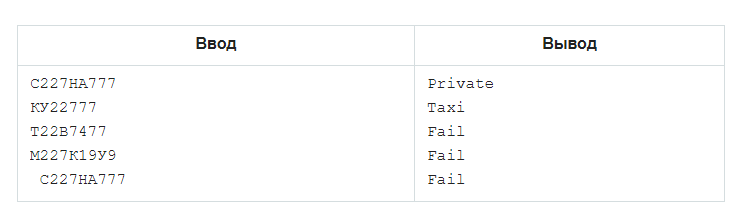

In [ ]:
# <Your code>

## Задача 02. Количество слов

Слово — это последовательность из букв (русских или английских), внутри которой могут быть дефисы.
На вход даётся текст, посчитайте, сколько в нём слов.

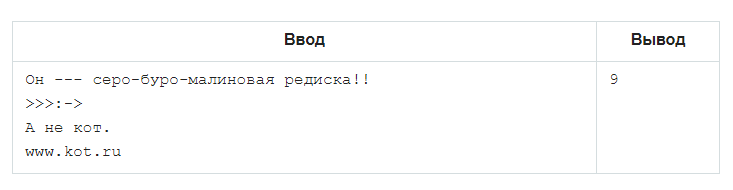

In [ ]:
# <Your code>

## Задача 03. Поиск e-mailов

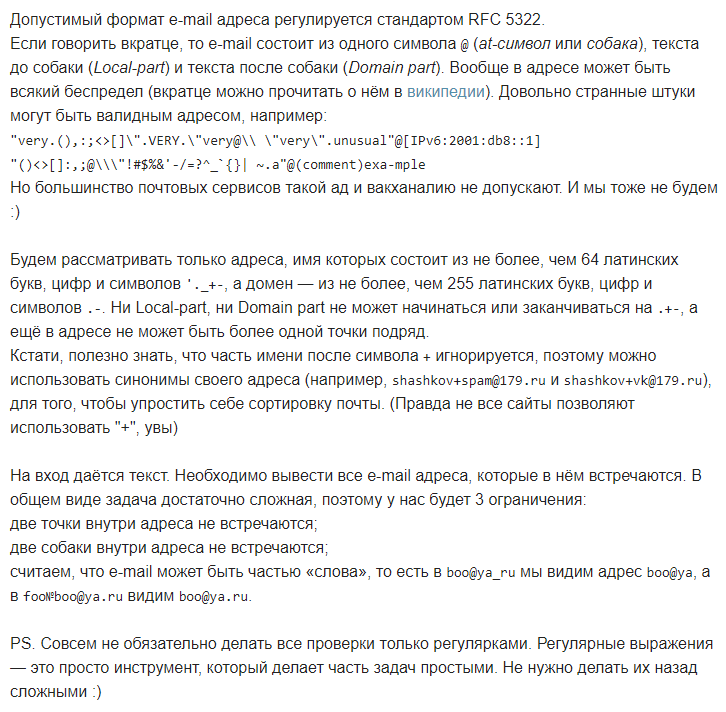

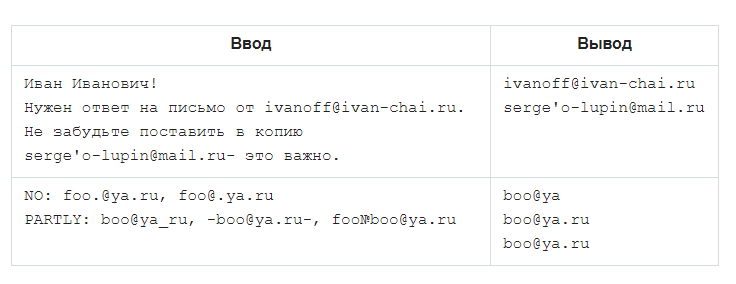

In [ ]:
# <Your code>

## Задача 04. Замена времени

Вовочка подготовил одно очень важное письмо, но везде указал неправильное время.
Поэтому нужно заменить все вхождения времени на строку (TBD). Время — это строка вида HH:MM:SS или HH:MM, в которой HH — число от 00 до 23, а MM и SS — число от 00 до 59.

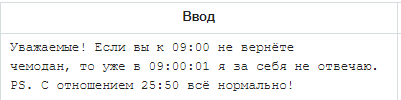

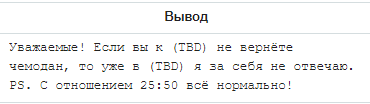

In [ ]:
# <Your code>

## Задача 05. Аббревиатуры

Владимир устроился на работу в одно очень важное место. И в первом же документе он ничего не понял,
там были сплошные ФГУП НИЦ ГИДГЕО, ФГОУ ЧШУ АПК и т.п. Тогда он решил собрать все аббревиатуры, чтобы потом найти их расшифровки на http://sokr.ru/. Помогите ему.

Будем считать аббревиатурой слова только лишь из заглавных букв (как минимум из двух). Если несколько таких слов разделены пробелами, то они
считаются одной аббревиатурой.

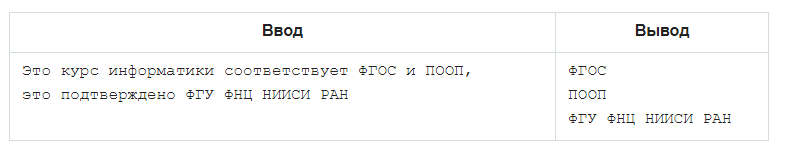

In [ ]:
# <Your code>

## Задача 06. Шифровка

Владимиру потребовалось срочно запутать финансовую документацию. Но так, чтобы это было обратимо.
Он не придумал ничего лучше, чем заменить каждое целое число (последовательность цифр) на его куб. Помогите ему.

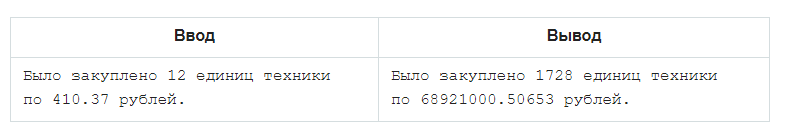

## Зажача 07. Аббревиатура

Акростих — осмысленный текст, сложенный из начальных букв каждой строки стихотворения.
Акроним — вид аббревиатуры, образованной начальными звуками (напр. НАТО, вуз, НАСА, ТАСС), которое можно произнести слитно (в отличие от аббревиатуры, которую произносят «по буквам», например: КГБ — «ка-гэ-бэ»).
На вход даётся текст. Выведите слитно первые буквы каждого слова. Буквы необходимо выводить заглавными.
Эту задачу можно решить в одну строчку.
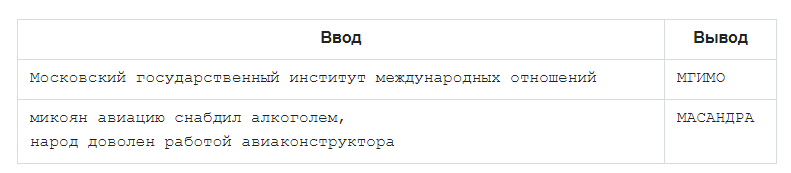

## Зажача 08. Хайку

Хайку — жанр традиционной японской лирической поэзии века, известный с XIV века.
Оригинальное японское хайку состоит из 17 слогов, составляющих один столбец иероглифов. Особыми разделительными словами — кирэдзи — текст хайку делится на части из 5, 7 и снова 5 слогов. При переводе хайку на западные языки традиционно вместо разделительного слова использую разрыв строки и, таким образом, хайку записываются как трёхстишия.

Перед вами трёхстишия, которые претендуют на то, чтобы быть хайку. В качестве разделителя строк используются символы / . Если разделители делят текст на строки, в которых 5/7/5 слогов, то выведите «Хайку!». Если число строк не равно 3, то выведите строку «Не хайку. Должно быть 3 строки.» Иначе выведите строку вида «Не хайку. В i строке слогов не s, а j.», где строка i — самая ранняя, в которой количество слогов неправильное.


Для простоты будем считать, что слогов ровно столько же, сколько гласных, не задумываясь о тонкостях.

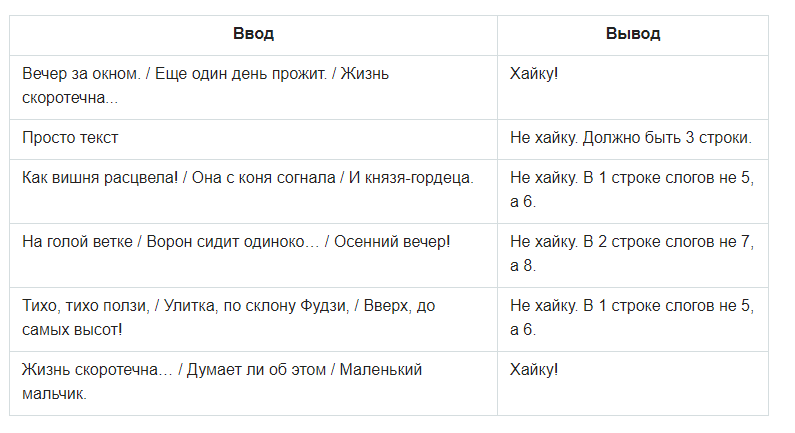

## Задача 09. CamelCase -> under_score

Владимир написал свой открытый проект, именуя переменные в стиле «ВерблюжийРегистр».
И только после того, как написал о нём статью, он узнал, что в питоне для имён переменных принято использовать подчёркивания для разделения слов (under_score). Нужно срочно всё исправить, пока его не «закидали тапками».

Задача могла бы оказаться достаточно сложной, но, к счастью, Владимир совсем не использовал строковых констант и классов.
Поэтому любая последовательность букв и цифр, внутри которой есть заглавные, — это имя переменной, которое нужно поправить.
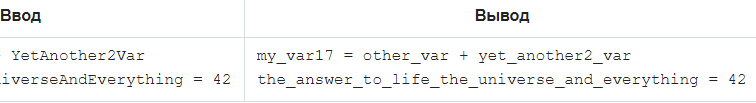


## Задача 10. Удаление повторов

Довольно распространённая ошибка ошибка — это повтор слова.
Вот в предыдущем предложении такая допущена. Необходимо исправить каждый такой повтор (слово, один или несколько пробельных символов, и снова то же слово).

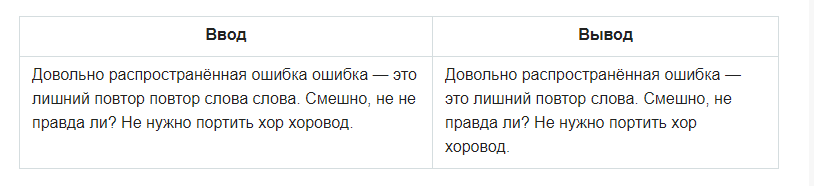

## Задача 11. Близкие слова

Для простоты будем считать словом любую последовательность букв, цифр и знаков _ (то есть символов \w).
Дан текст. Необходимо найти в нём любой фрагмент, где сначала идёт слово «олень», затем не более 5 слов, и после этого идёт слово «заяц».

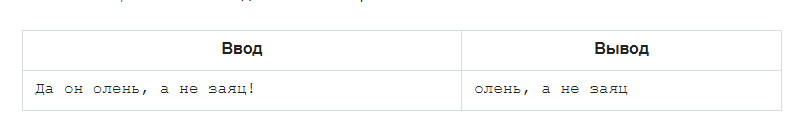

## Задача 13. Форматирование больших чисел

Большие целые числа удобно читать, когда цифры в них разделены на тройки запятыми.
Переформатируйте целые числа в тексте.

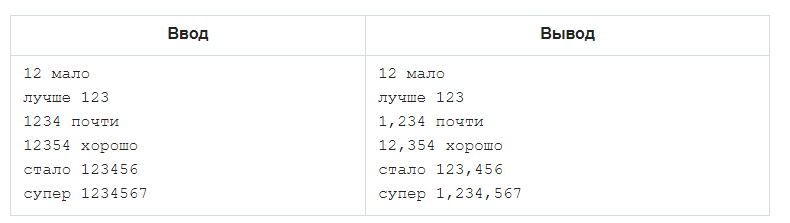

## Задача 14. Разделить текст на предложения

Для простоты будем считать, что:

- каждое предложение начинается с заглавной русской или латинской буквы;
- каждое предложение заканчивается одним из знаков препинания .;!?;
- между предложениями может быть любой непустой набор пробельных символов;
- внутри предложений нет заглавных и точек (нет пакостей в духе «Мы любим творчество А. С. Пушкина)».

Разделите текст на предложения так, чтобы каждое предложение занимало одну строку.
Пустых строк в выводе быть не должно. Любые наборы из полее одного пробельного символа замените на один пробел.

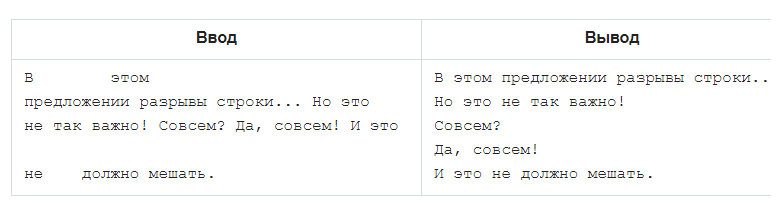

## Задача 15. Форматирование номера телефона

Если вы когда-нибудь пытались собирать номера мобильных телефонов, то наверняка знаете, что почти любые 10 человек используют как минимум пяток различных способов записать номер телефона. Кто-то начинает с +7, кто-то просто с 7 или 8, а некоторые вообще не пишут префикс. Трёхзначный код кто-то отделяет пробелами, кто-то при помощи дефиса, кто-то скобками (и после скобки ещё пробел некоторые добавляют). После следующих трёх цифр кто-то ставит пробел, кто-то дефис, кто-то ничего не ставит. И после следующих двух цифр — тоже. А некоторые начинают за здравие, а заканчивают… В общем очень неудобно!


На вход даётся номер телефона, как его мог бы ввести человек. Необходимо его переформатировать в формат +7 123 456-78-90. Если с номером что-то не так, то нужно вывести строчку Fail!.
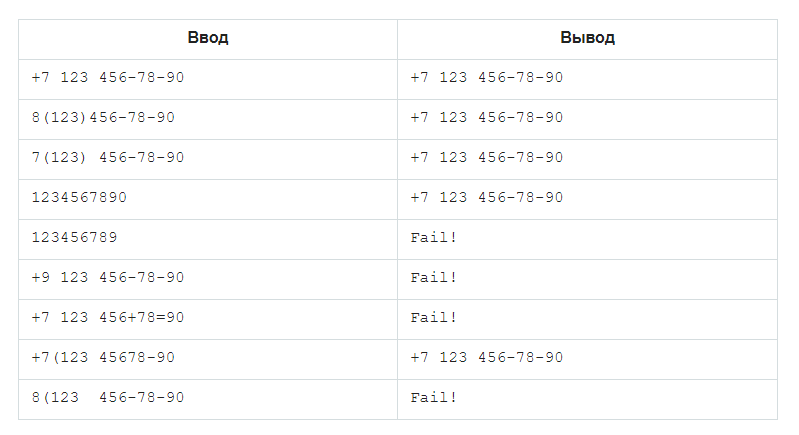

## Задача 15. Поиск emailов - 2

В предыдущей задаче мы немного схалтурили.
Однако к этому моменту задача должна стать посильной!

На вход даётся текст. Необходимо вывести все e-mail адреса, которые в нём встречаются. При этом e-mail не может быть частью слова, то есть слева и справа от e-mail'а должен быть либо конец строки, либо не-буква и при этом не один из символов '._+-, допустимых в адресе.

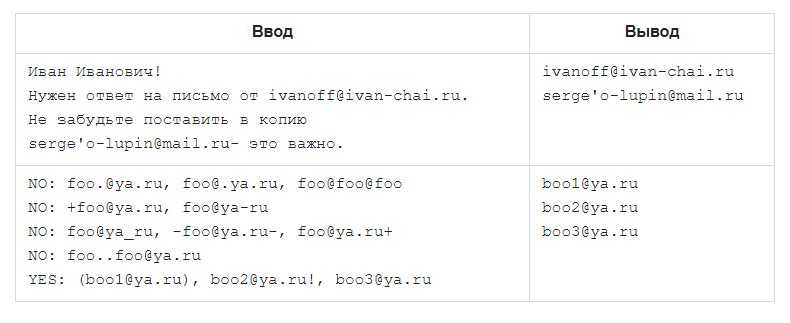

1. [Оригинальная документация:](https://docs.python.org/3/library/re.html)
2. [Очень подробный и обстоятельный материал:](https://www.regular-expressions.info/)
3. [Разные сложные трюки и тонкости с примерами:](http://www.rexegg.com/)
4. [Он-лайн отладка регулярок](https://regex101.com)
5. [Он-лайн визуализация регулярок](https://www.debuggex.com/ )
6. [Ссылка на статью](https://habr.com/ru/post/349860/#Dokumentatsiya_i_ssylki)